<h1 style='text-align:center'>Multilayer Perceptrons</h1>

<img src='images/non-linear-meme.webp'/>

How do we learn a non linear decision boundary? 

<img src='images/non-linear.png'/>

By connecting several perceptrons together and introducing non-linear activation functions neural networks can learn more complex functions. For a more intuitive understanding of how this works check out this video: https://www.youtube.com/watch?v=u5GAVdLQyIg

## MLP Architecture 

<img src='images/mlp.png' />

## How do MLPs Learn? 

Similar to regular perceptrons! Make a calculation, see how close it is to the actual answer, adjust weights and try again. 

### Forward-Propagation  

In forward-propagation, the hidden layer(s) multiply each input node by a weight, apply a decision function (activation function) to decide whether fire/activate or not, and the output layer makes the final decision based on inputs from the previously layers fired neurons. 

### Additional Activation Functions 

<img src='images/activation.png'/>

##### Why do we need non-linear activation functions? 

#### Back-Propagation

In back-propagation, we are updating the weights based on our cost function

<img src='images/back.png'/>

<b>Epochs - When an ENTIRE dataset is passed forward and backward through the neural network 

Batch size - one epoch is too big to feed to the computer at once so we feed it through in smaller batches and update weights after each batch</b>

##### What is each node learning? 

## Code

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


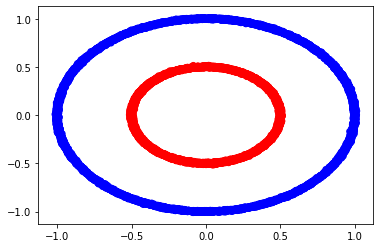

In [2]:
#generate some non-linearly separrable data 
n=10000
t = np.linspace(0,2,n)
x1 = np.sin(np.pi*t) + np.random.normal(0,.005,n)
x2 = np.cos(np.pi*t) + np.random.normal(0,.005,n)
label = np.ones(n)

tdf = pd.DataFrame({'label' : label, 'x1' : x1, 'x2' : x2})

t = np.linspace(0,2,n)
x1 = .5*np.sin(np.pi*t) + np.random.normal(0,.005,n)
x2 = .5*np.cos(np.pi*t) + np.random.normal(0,.005,n)
label = 0.*np.ones(n)

df = pd.concat([tdf, pd.DataFrame({'label' : label, 'x1' : x1, 'x2' : x2})])
plt.scatter(df['x1'],df['x2'], color=df['label'].apply(lambda x :  'b' if x > .5 else 'r'))

In [3]:
#separate features and labels
X = df[['x1','x2']]
Y = df['label']

In [4]:
#train test split
from sklearn.model_selection import train_test_split
X_model, X_test, y_model, y_test = train_test_split(X,Y, test_size=0.20, random_state=123)

In [34]:
#initialize Sequential model
model = Sequential()
#intitalize input layer 
model.add(Dense(8, input_dim=2, activation='relu'))
#hidden layer with relu activation
model.add(Dense(8, activation='relu'))
#output layer / decision layer 
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [36]:
model.fit(X_model, y_model, epochs=20, batch_size=100)

Epoch 1/20
16000/16000 [==============================] - 1s 61us/step - loss: 0.6606 - acc: 0.5527
Epoch 2/20
16000/16000 [==============================] - 0s 13us/step - loss: 0.5309 - acc: 0.9455
Epoch 3/20
16000/16000 [==============================] - 0s 12us/step - loss: 0.3319 - acc: 1.0000
Epoch 4/20
16000/16000 [==============================] - 0s 12us/step - loss: 0.1488 - acc: 1.0000
Epoch 5/20
16000/16000 [==============================] - 0s 12us/step - loss: 0.0647 - acc: 1.0000
Epoch 6/20
16000/16000 [==============================] - 0s 12us/step - loss: 0.0325 - acc: 1.0000
Epoch 7/20
16000/16000 [==============================] - 0s 12us/step - loss: 0.0188 - acc: 1.0000
Epoch 8/20
16000/16000 [==============================] - 0s 13us/step - loss: 0.0120 - acc: 1.0000
Epoch 9/20
16000/16000 [==============================] - 0s 12us/step - loss: 0.0082 - acc: 1.0000
Epoch 10/20
16000/16000 [==============================] - 0s 14us/step - loss: 0.0059 - acc: 1.0000

In [8]:
model.evaluate(X_test, y_test)

4000/4000 [==============================] - 0s 35us/step


[0.04567596331238746, 1.0]

## Optimization and Regularization

### L1 and L2 Regularization

### Dropout Regularization

<img src='images/thanos.png'/>

### Optimization 

- Optimizers 
- Number of nodes
- Number of layers
- Number of Epochs 
- Batch size 
- Learning Rate
- Different Activation Functions
- Scaling/Normalizing Data

Optimization and Regularization

## Resources

https://www.youtube.com/watch?v=u5GAVdLQyIg

https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi

https://www.coursera.org/learn/neural-networks-deep-learning/home/welcome

https://towardsdatascience.com/optimizing-neural-networks-where-to-start-5a2ed38c8345